In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

device = "cuda" if torch.cuda.is_available() else "cpu"

In [2]:
%reload_ext autoreload
%autoreload 2

from src.constants import csv_file, directory, INPUT_SHAPE, YEAR, ext

from src.utils import (
    get_dataloader,
    split_val,
)

from src.model import Model_Retinopathy

from src.constants import EPOCHS, BATCH_SIZE, LEARNING_RATE, UPDATES
from src.constants import K_CLIENTS, C, rounds, clients
from src.constants import optimizer_fn

In [3]:
df = pd.read_csv(csv_file)
train_df, val_df = split_val(df, 0.1)

_, val_loader = get_dataloader(val_df, ext, directory, BATCH_SIZE)

In [4]:
def get_best_lr(init_lr, final_lr, epochs, num_iterations=20):
    learning_rates = [
        init_lr * math.exp((math.log(final_lr / init_lr) / (num_iterations - 1)) * i)
        for i in range(num_iterations)
    ]
    learning_rates = torch.tensor(learning_rates)

    model = Model_Retinopathy(optimizer_fn, train_df, val_loader).to(device)
    weights = model.get_weights()
    best_loss, all_losses = {}, {}
    for lr in learning_rates:
        print(f"LR = {lr}\n")
        model = Model_Retinopathy(optimizer_fn, train_df, val_loader, lr=lr).to(device)
        model.set_weights(weights)
        model.train_loop(epochs)
        best_loss[lr] = min(model.get_val_losses())
        all_losses[lr] = model.get_val_losses()

    return best_loss, all_losses

In [5]:
""" best_losses, losses = get_best_lr(1e-1, 1e-4, 10, 10)
plt.plot(list(best_losses.keys()), list(best_losses.values()))
plt.xscale("log") """

' best_losses, losses = get_best_lr(1e-1, 1e-4, 10, 10)\nplt.plot(list(best_losses.keys()), list(best_losses.values()))\nplt.xscale("log") '

In [7]:
model = Model_Retinopathy(optimizer_fn, train_df, val_loader, lr=0.02).to(device)
model.train_loop(50)

VALIDATION:  {'loss': 1.5941, 'accuracy': 0.2732, 'f1': 0.6739, 'accuracy_binary': 0.5082, 'recall': 1.0, 'precision': 0.5082}
Epoch: 0
VALIDATION:  {'loss': 1.0738, 'accuracy': 0.5355, 'f1': 0.2844, 'accuracy_binary': 0.5738, 'recall': 0.1667, 'precision': 0.9688}
Epoch: 1
VALIDATION:  {'loss': 0.8244, 'accuracy': 0.6967, 'f1': 0.8944, 'accuracy_binary': 0.8962, 'recall': 0.8656, 'precision': 0.9253}
Epoch: 2
VALIDATION:  {'loss': 0.822, 'accuracy': 0.7022, 'f1': 0.9189, 'accuracy_binary': 0.918, 'recall': 0.914, 'precision': 0.9239}
Epoch: 3
VALIDATION:  {'loss': 0.838, 'accuracy': 0.6967, 'f1': 0.9206, 'accuracy_binary': 0.918, 'recall': 0.9355, 'precision': 0.9062}
Epoch: 4
VALIDATION:  {'loss': 0.8154, 'accuracy': 0.7049, 'f1': 0.8997, 'accuracy_binary': 0.9044, 'recall': 0.8441, 'precision': 0.9632}
Epoch: 5
VALIDATION:  {'loss': 0.8238, 'accuracy': 0.6995, 'f1': 0.8989, 'accuracy_binary': 0.9016, 'recall': 0.8602, 'precision': 0.9412}
Epoch: 6
VALIDATION:  {'loss': 0.8212, 'accu

KeyboardInterrupt: 

In [8]:
model = Model_Retinopathy(optimizer_fn, train_df, val_loader, lr=0.005).to(device)
model.train_loop(25)

VALIDATION:  {'loss': 1.6053, 'accuracy': 0.2732, 'f1': 0.6739, 'accuracy_binary': 0.5082, 'recall': 1.0, 'precision': 0.5082}
Epoch: 0
VALIDATION:  {'loss': 1.2438, 'accuracy': 0.4918, 'f1': 0.0, 'accuracy_binary': 0.4918, 'recall': 0.0, 'precision': 0.0}
Epoch: 1
VALIDATION:  {'loss': 1.0915, 'accuracy': 0.4945, 'f1': 0.0213, 'accuracy_binary': 0.4973, 'recall': 0.0108, 'precision': 1.0}
Epoch: 2
VALIDATION:  {'loss': 0.96, 'accuracy': 0.5874, 'f1': 0.5714, 'accuracy_binary': 0.6885, 'recall': 0.4086, 'precision': 0.95}
Epoch: 3
VALIDATION:  {'loss': 0.8678, 'accuracy': 0.6885, 'f1': 0.8802, 'accuracy_binary': 0.8825, 'recall': 0.8495, 'precision': 0.9133}
Epoch: 4
VALIDATION:  {'loss': 0.8389, 'accuracy': 0.6967, 'f1': 0.9076, 'accuracy_binary': 0.9071, 'recall': 0.8978, 'precision': 0.9176}
Epoch: 5
VALIDATION:  {'loss': 0.8219, 'accuracy': 0.7022, 'f1': 0.9101, 'accuracy_binary': 0.9098, 'recall': 0.8978, 'precision': 0.9227}
Epoch: 6
VALIDATION:  {'loss': 0.8466, 'accuracy': 0.69

In [10]:
model = Model_Retinopathy(optimizer_fn, train_df, val_loader, lr=0.01).to(device)
model.train_loop(25)

Epoch: 25
VALIDATION:  {'loss': 0.7711, 'accuracy': 0.7213, 'f1': 0.9268, 'accuracy_binary': 0.9262, 'recall': 0.9194, 'precision': 0.9344}
Epoch: 26
VALIDATION:  {'loss': 0.7648, 'accuracy': 0.7295, 'f1': 0.938, 'accuracy_binary': 0.9372, 'recall': 0.9355, 'precision': 0.9405}
Epoch: 27
VALIDATION:  {'loss': 0.7865, 'accuracy': 0.7186, 'f1': 0.9282, 'accuracy_binary': 0.929, 'recall': 0.9032, 'precision': 0.9545}
Epoch: 28
VALIDATION:  {'loss': 0.7648, 'accuracy': 0.7131, 'f1': 0.9282, 'accuracy_binary': 0.929, 'recall': 0.9032, 'precision': 0.9545}
Epoch: 29
VALIDATION:  {'loss': 0.7735, 'accuracy': 0.7022, 'f1': 0.926, 'accuracy_binary': 0.9262, 'recall': 0.9086, 'precision': 0.9441}
Epoch: 30
VALIDATION:  {'loss': 0.7807, 'accuracy': 0.7186, 'f1': 0.938, 'accuracy_binary': 0.9372, 'recall': 0.9355, 'precision': 0.9405}
Epoch: 31
VALIDATION:  {'loss': 0.7611, 'accuracy': 0.7049, 'f1': 0.9377, 'accuracy_binary': 0.9372, 'recall': 0.9301, 'precision': 0.9454}
Epoch: 32
VALIDATION:  {'

KeyboardInterrupt: 

LR = 0.10000000149011612

Epoch: 0
VALIDATION:  {'accuracy': 0.4918032786885246, 'loss': 1.2914074322451716}
Epoch: 1
VALIDATION:  {'accuracy': 0.4918032786885246, 'loss': 1.3012934560361116}
Epoch: 2
VALIDATION:  {'accuracy': 0.4918032786885246, 'loss': 1.1600224919941113}
Epoch: 3
VALIDATION:  {'accuracy': 0.4918032786885246, 'loss': 1.2934144372525422}
Epoch: 4
VALIDATION:  {'accuracy': 0.4918032786885246, 'loss': 1.293170812337295}
Epoch: 5
VALIDATION:  {'accuracy': 0.6256830601092896, 'loss': 1.0047486605851546}
Epoch: 6
VALIDATION:  {'accuracy': 0.4918032786885246, 'loss': 1.199531184590381}
Epoch: 7
VALIDATION:  {'accuracy': 0.4918032786885246, 'loss': 1.291319137034209}
Epoch: 8
VALIDATION:  {'accuracy': 0.6775956284153005, 'loss': 0.9107682095921558}
Epoch: 9
VALIDATION:  {'accuracy': 0.6475409836065574, 'loss': 0.9217138005339581}
Epoch: 10
VALIDATION:  {'accuracy': 0.674863387978142, 'loss': 0.8786482836889185}
Epoch: 11
VALIDATION:  {'accuracy': 0.5519125683060109, 'loss': 

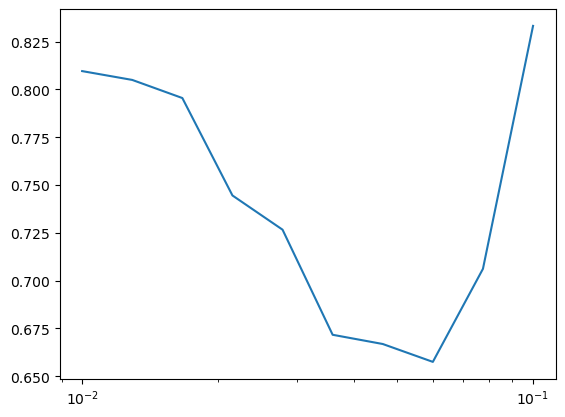

In [13]:
""" best_losses, losses = get_best_lr(1e-1, 1e-2, 20, 10)
plt.plot(list(best_losses.keys()), list(best_losses.values()))
plt.xscale("log") """

In [14]:
""" print(best_losses) """

{tensor(0.1000): 0.8332000335921412, tensor(0.0774): 0.7061277524284695, tensor(0.0599): 0.6574592771737472, tensor(0.0464): 0.6668097001055012, tensor(0.0359): 0.6716352092183154, tensor(0.0278): 0.7266005115664523, tensor(0.0215): 0.744499288175417, tensor(0.0167): 0.795458030441533, tensor(0.0129): 0.8049305781074192, tensor(0.0100): 0.8095480618269547}


In [ ]:
best_losses, losses = get_best_lr(1e-1, 1e-6, 20, 30)
plt.plot(list(best_losses.keys()), list(best_losses.values()))
plt.xscale("log")